In [21]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head(10))
print("\n\n")
print(df.isnull().sum())
print("\n\n")
print(df.info())
print("\n\n")
print(df.describe())
print("\n\n")
print(df.columns)


#delete unwanted columns
df = df.drop(columns=["customerID"])

#fill any null data or convert its datatypes
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


#Doing label encoding or mapping of target data 

df["Churn"]=df["Churn"].map({"Yes":1,"No":0})

print(df.head())


#doing One Hot Encoding on the feature columns of categorical data using get dummies
data_ohe = pd.get_dummies(
    df ,
    columns = ['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
    drop_first = True

)

print(data_ohe.head())

#defining X feature varibles and y target variables

X = data_ohe.drop(columns=["Churn"])
y = data_ohe["Churn"]


#spilts it 
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#appliying logistic regression model 
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)


#predict it 

y_pred = model.predict(X_test)
print("\n\n")

print("Accuracy:", accuracy_score(y_test , y_pred))
print("\n\n")

print("Confusion Matrix:", confusion_matrix(y_test , y_pred))
print("\n\n")
print("Classification REport :", classification_report(y_test, y_pred))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

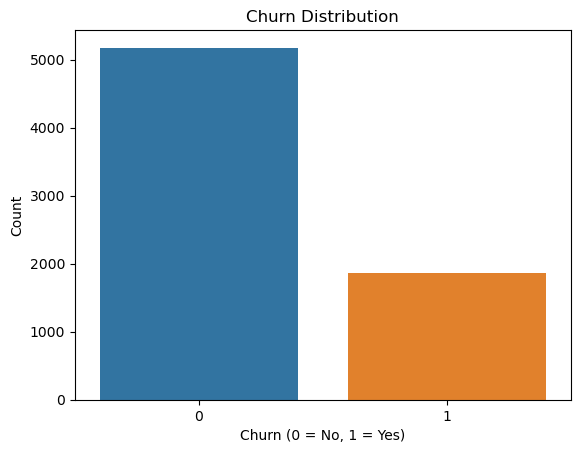

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


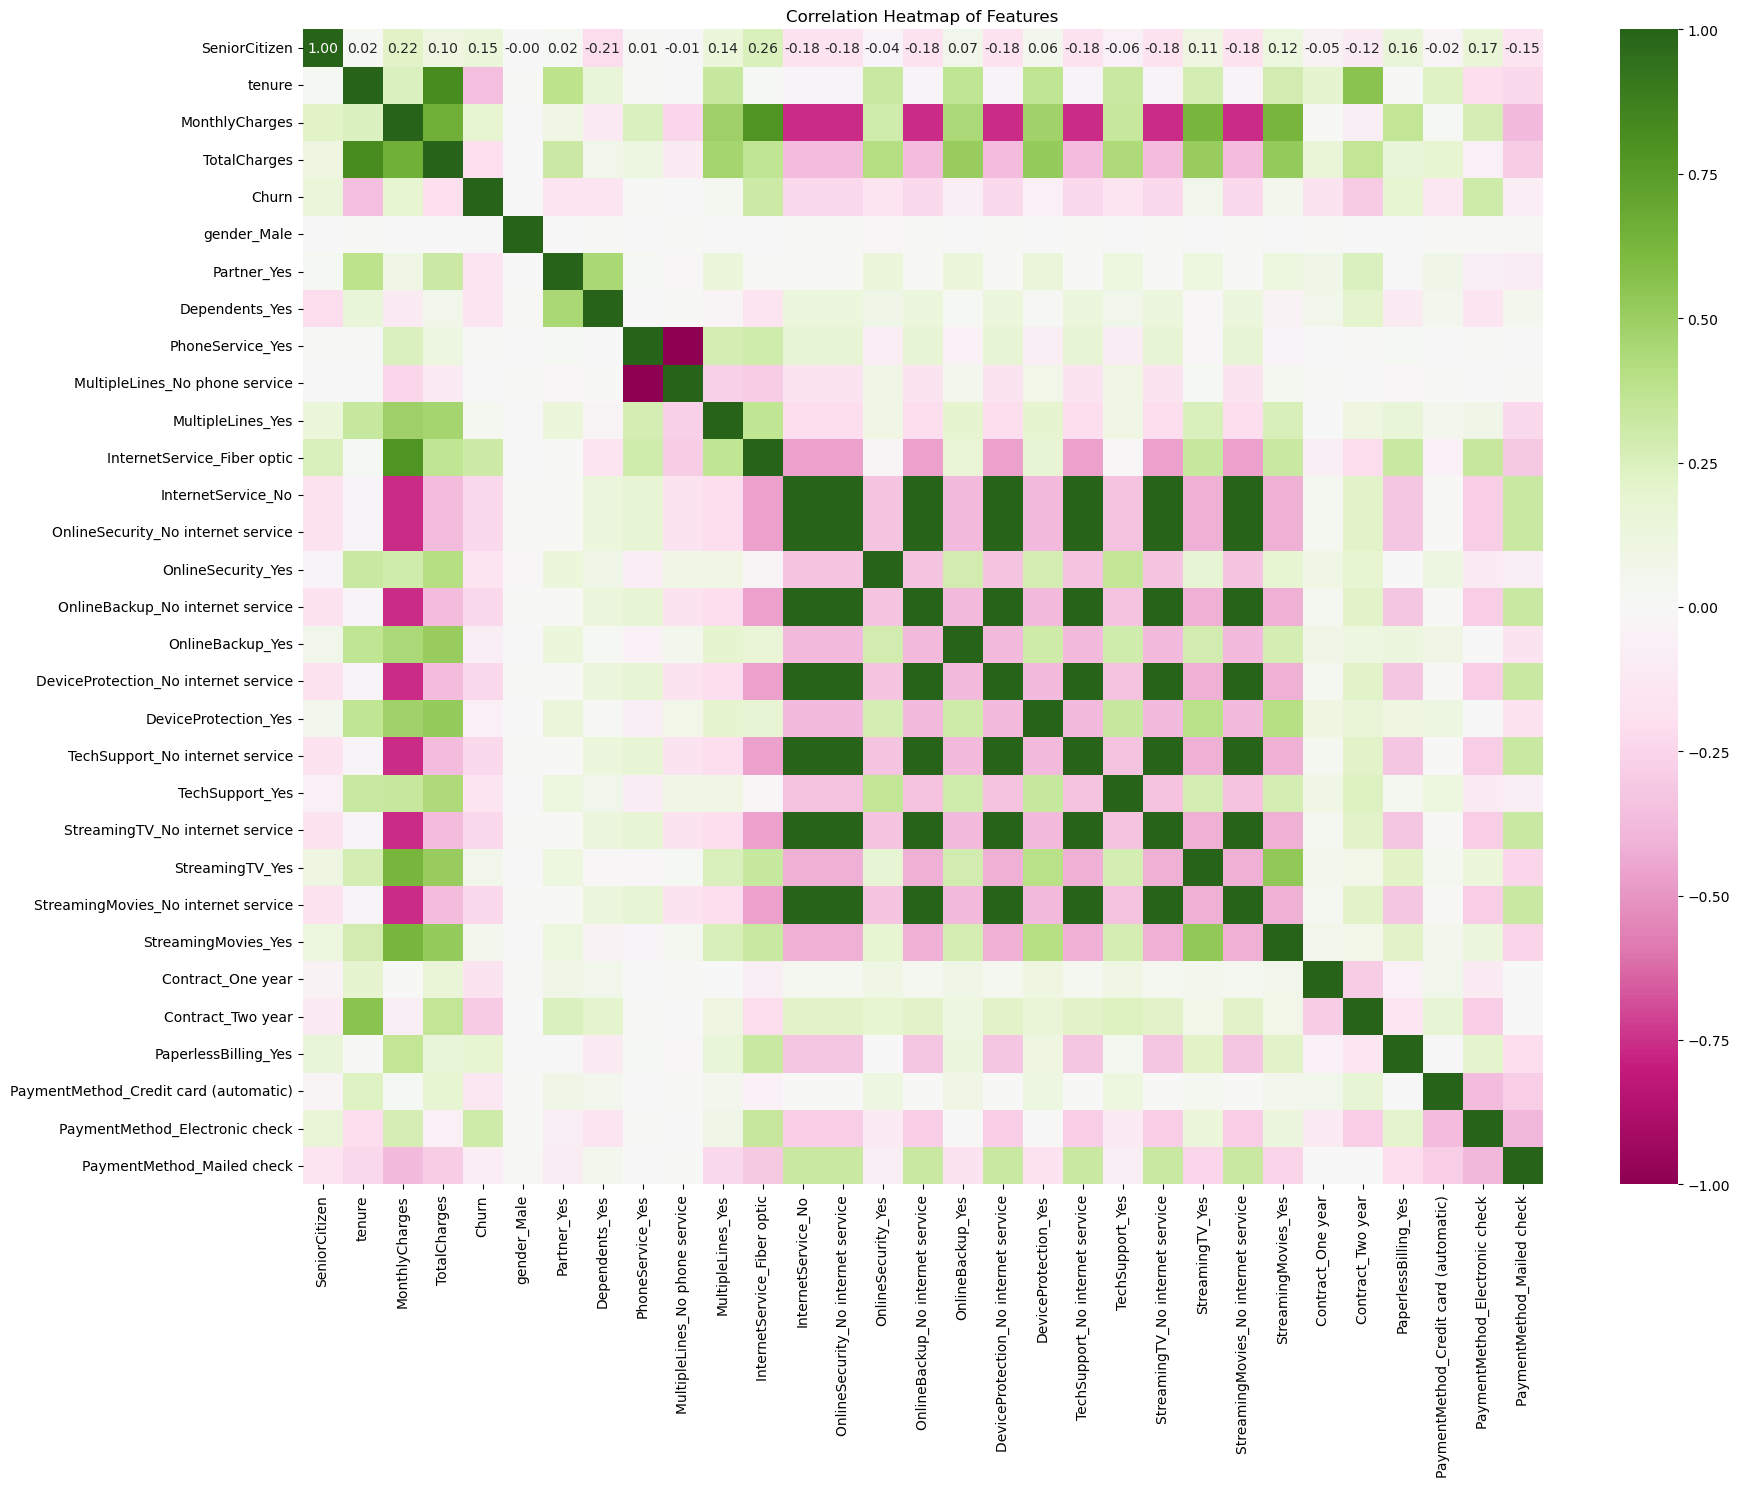

In [38]:
# Correlation matrix for numerical features
correlation_matrix = data_ohe.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt='.2f') #coolwarm
plt.title('Correlation Heatmap of Features')
plt.show()


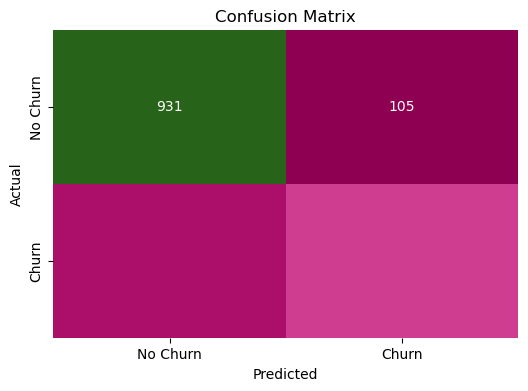

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', cbar=False, #blues
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


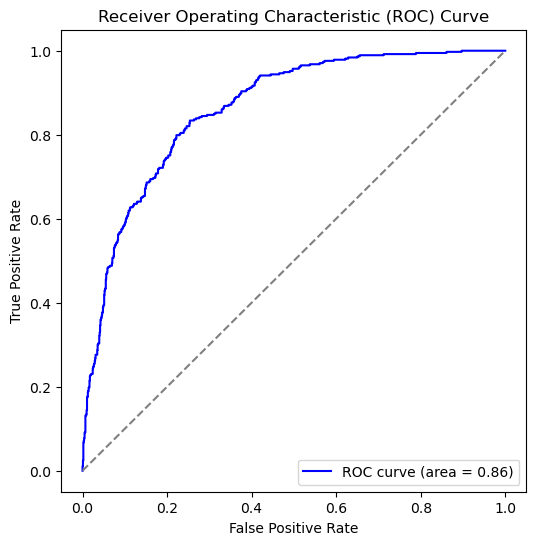

In [33]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


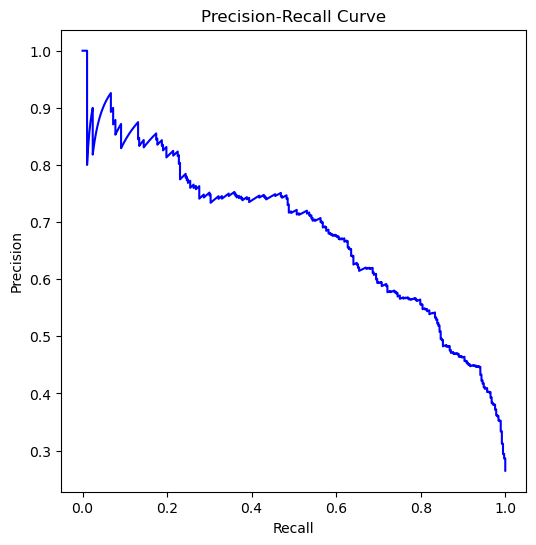

In [34]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


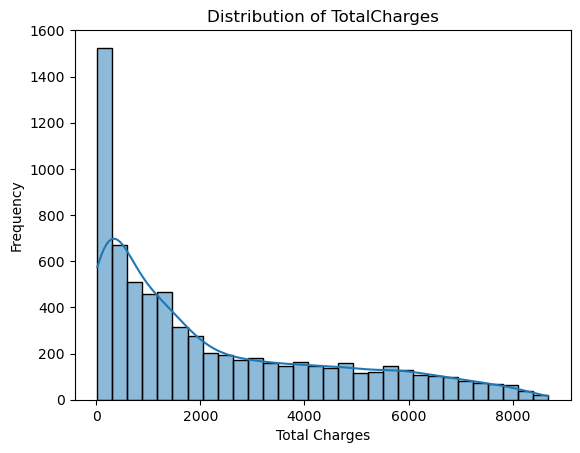

In [35]:
# Visualize the distribution of 'TotalCharges' (example)
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Distribution of TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


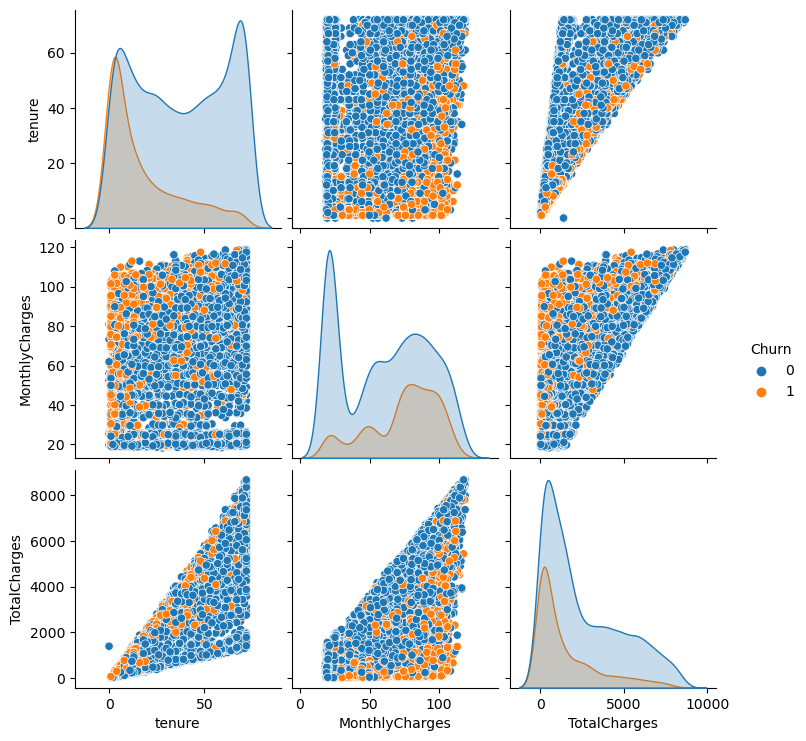

In [36]:
# Select some features to visualize pairplot
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()
